# Get the data

In [1]:
import pandas as pd

In [2]:
HOUSING_PATH = "../datasets/housing/housing.csv"

In [3]:
def load_housing_data(housing_path=HOUSING_PATH):
    return pd.read_csv(housing_path)

In [4]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

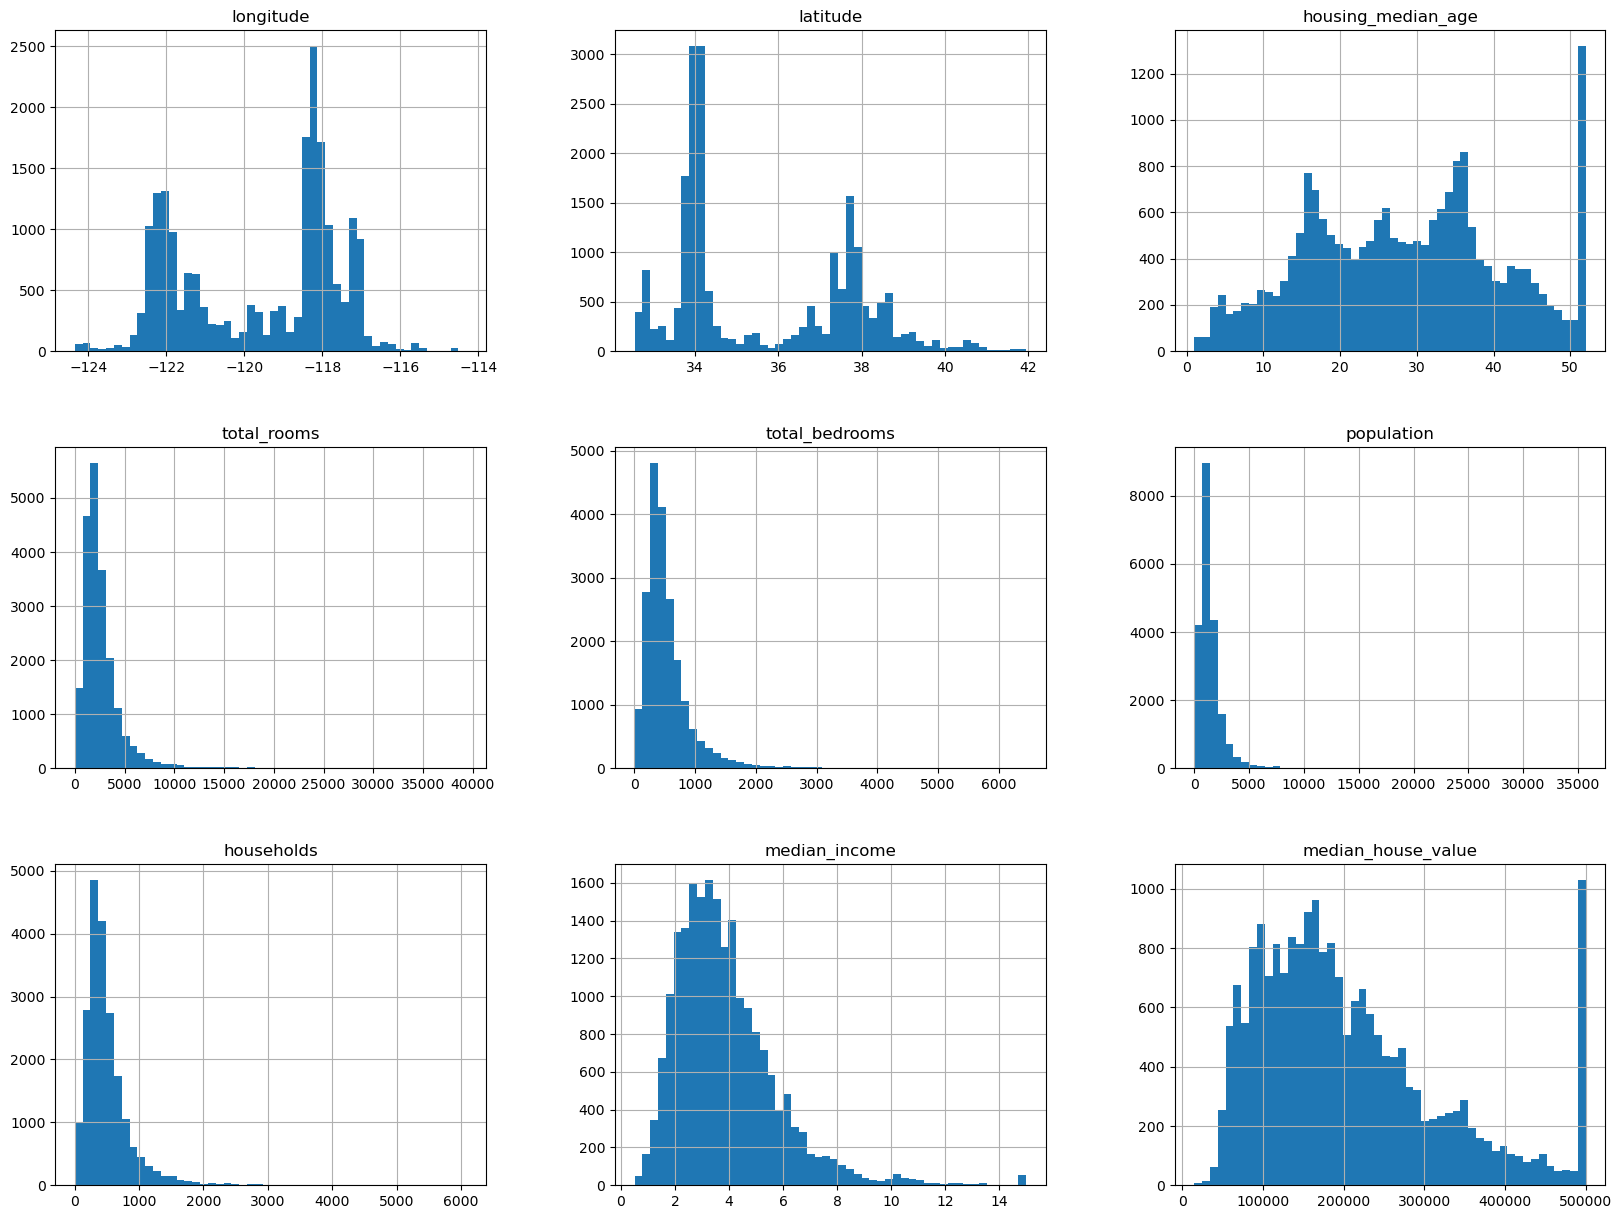

In [9]:
housing.hist(bins=50, figsize=(20, 15))
plt.show()

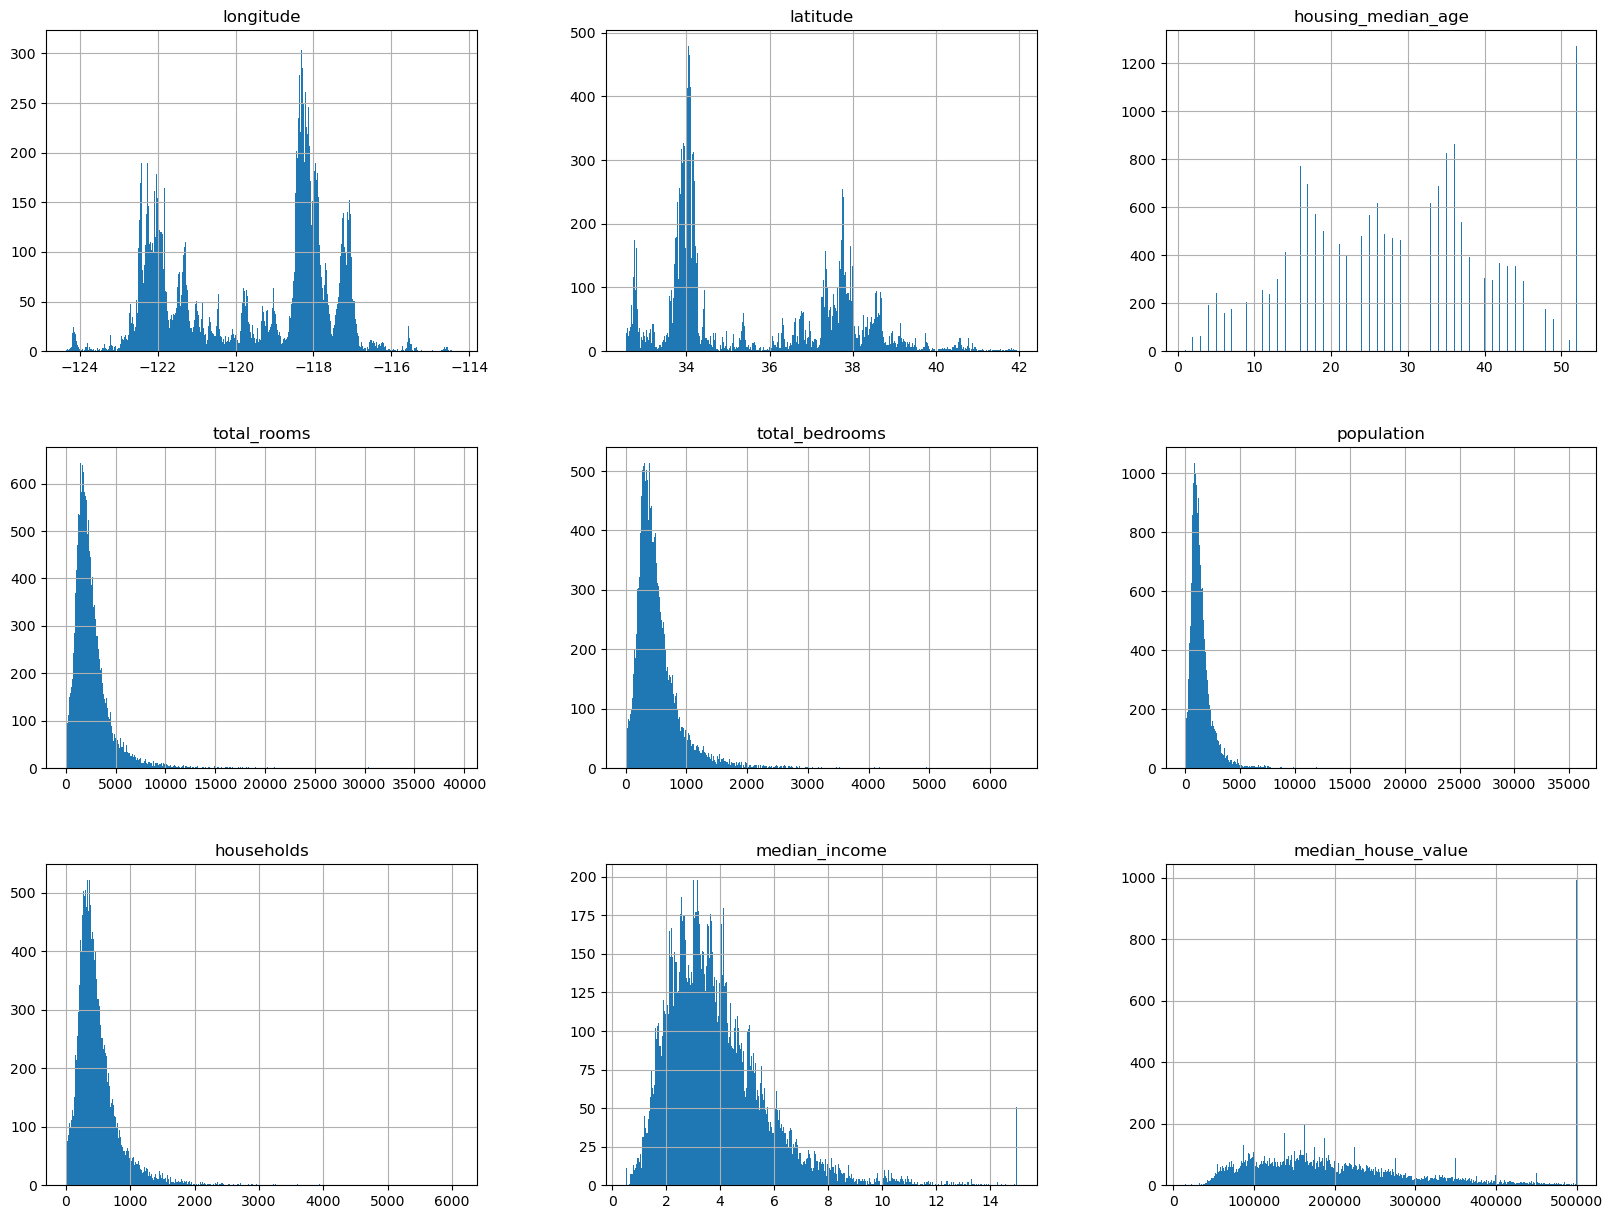

In [10]:
housing.hist(bins=500, figsize=(20, 15))
plt.show()

## Creating Test-Sets and Training-Sets

In [11]:
import numpy as np

### Creating a test set randomly
Creating a test set is theoretically simple: pick some instances randomly, typically 20 % of the dataset (or less for very larg data sets), and set them aside.

This works well  but it is not perfext, if you run it again it will generate a different set. Over time you will get to see the whole dataset which is what you want to avoid.

One solution is to save the test set on the first run and reload it in subsequent runs, Another option is to set the random number generator's seed (e.g. with np.random.seed(42)) before calling np.random.permutation() so that it always generates the same shuffled indices.

In [12]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
train_set, test_set = split_train_test(housing, 0.20)

In [14]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13346,-117.64,34.03,11.0,2050.0,382.0,1044.0,371.0,4.8281,137000.0,INLAND
8751,-118.37,33.82,36.0,2416.0,394.0,1115.0,386.0,6.2560,366900.0,<1H OCEAN
5816,-118.25,34.13,22.0,2340.0,773.0,2226.0,754.0,2.5417,217500.0,<1H OCEAN
13494,-117.35,34.04,14.0,2991.0,522.0,1729.0,537.0,3.5139,146800.0,INLAND
17885,-121.97,37.40,17.0,2937.0,558.0,1662.0,533.0,5.8792,255500.0,<1H OCEAN


### Using UID to identify chosen test data

Both the solutions to choose random data will break if the data ever gets updated. A common solution is to use each instance's identifier to decide whether or not it should be included in the test set. For example you could compute the hash of each instance's identifier and put that instance in the test set if the hash is lower than or equal to 20% of the maximum hash value. This will ensure the test set remains consistent across multiple runs, even if you refresh the data set.
The new test set will contain 20% of the new instances, but it will not contain any instance's that was previously in the training set.

In [15]:
from zlib import crc32

In [16]:
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

In [17]:
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [18]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [19]:
len(train_set)

16512

In [20]:
len(test_set)

4128

### Using Scikit-Learn

Scikit-Learn provides a few functions to split datasets into multiple subsets in various ways. The simpilest is `train_test_split()`, which does pretty much the same thing as the function `split_train_test()`, with a couple of features.
First, there is a `random_state` parameter that allows you to set the random generator seed. Second, you can pass it multiple datasets with identical numbers of rows, and it will split them on the same indicies (this is very useful, for example, if you have a seperate DataFrame for labels)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [23]:
len(train_set)

16512

In [24]:
len(test_set)

4128

### Sampling Bias

You want to ensure the test sets are representative of of various categories of incomes in the whole dataset.

Since the median income is a continuos numerical attribute, you first need to create an income category attribute.

#### Creating income category attribute with five categories (labeled from 1 to 5)

In [25]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

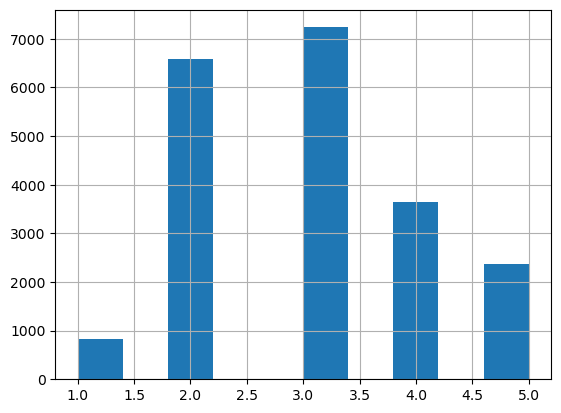

In [26]:
housing["income_cat"].hist()

Now you are ready to do stratified sampling based on the income category. For this we can use Scikit-Learn's StratifiedShufflingSplit class:

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit

In [28]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [29]:
strat_train_set["income_cat"].value_counts() / len(strat_test_set)

3    1.402374
2    1.275436
4    0.705184
5    0.457849
1    0.159157
Name: income_cat, dtype: float64

In [30]:
strat_train_set["income_cat"].value_counts()

3    5789
2    5265
4    2911
5    1890
1     657
Name: income_cat, dtype: int64

In [31]:
# Dropping the "income_cat" attribute so the data is back to its original state:

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [32]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN


In [33]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN


# Discover and Visualize the Data to Gain Insights

First we must set the test set aside and explore the training set. If the training set is very large you may want to create a exploriation set, to make manipulations easy and fast. 

In [34]:
# Making a copy of the test set

housing = strat_train_set.copy()

## Visualising Geographical Data
Since there is geographical (long, lat), it is a good idea to create a scatterplot of all ditricts to visualize the data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

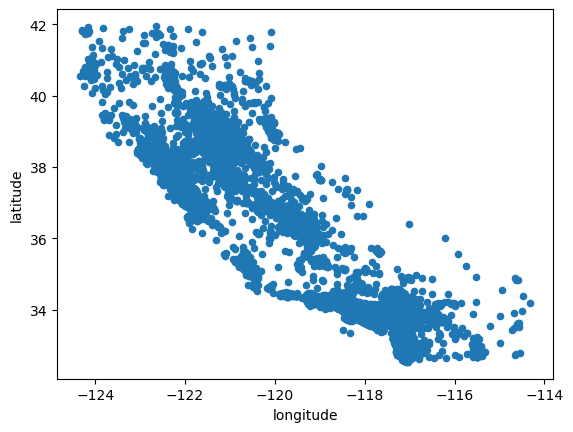

In [35]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

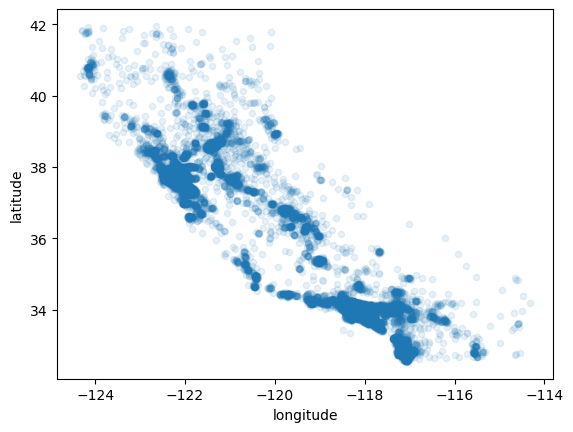

In [36]:
# A better visualization of measuring densities
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

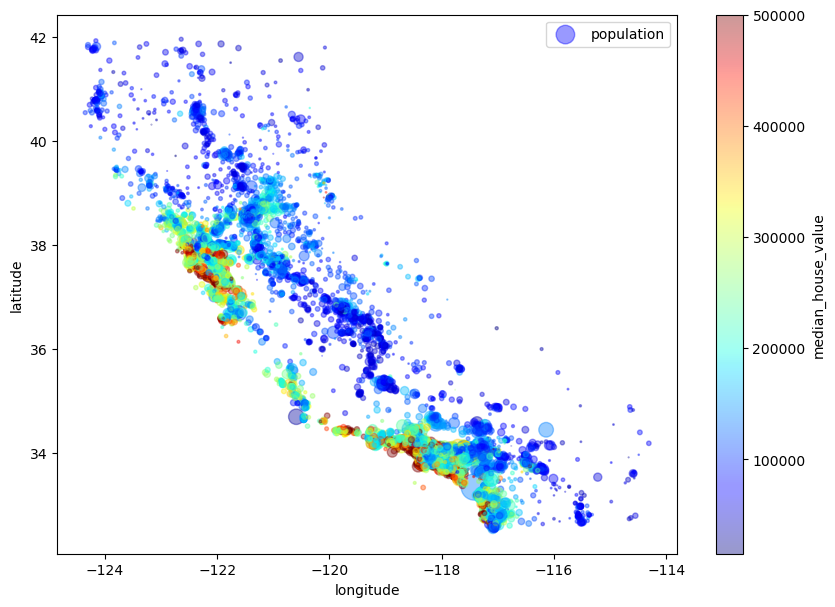

In [37]:
# California housing prices: red: expensive, blue: is cheap, larger circles indicate areas with larger population
# s: districts population
# c: colour represents the price
# cmap: jet, a predefined map with ranges blue (low prices) to red(high prices)

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

## Looking for correlations
Since the dataset is not too large, you can easily compute the standard correlation coefficient (also called Pearson's r) between every pair of attributes using the `corr()` method:

In [38]:
corr_matrix = housing.corr()

In [39]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [40]:
corr_matrix["total_rooms"].sort_values(ascending=False)

total_rooms           1.000000
total_bedrooms        0.929391
households            0.918396
population            0.855103
median_income         0.200133
median_house_value    0.135140
longitude             0.048909
latitude             -0.039245
housing_median_age   -0.364535
Name: total_rooms, dtype: float64

In [41]:
corr_matrix["population"].sort_values(ascending=False)

population            1.000000
households            0.904639
total_bedrooms        0.876324
total_rooms           0.855103
longitude             0.108071
median_income         0.002421
median_house_value   -0.026882
latitude             -0.115290
housing_median_age   -0.298737
Name: population, dtype: float64

### Another way to compute correlations using pandas scatter_matrix()
Since we have 11 numerical attributes, we have 11^2 = 121 plots which could be generated. So we will just focus on a few promising attributes that seem most correlated with the median housing value

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

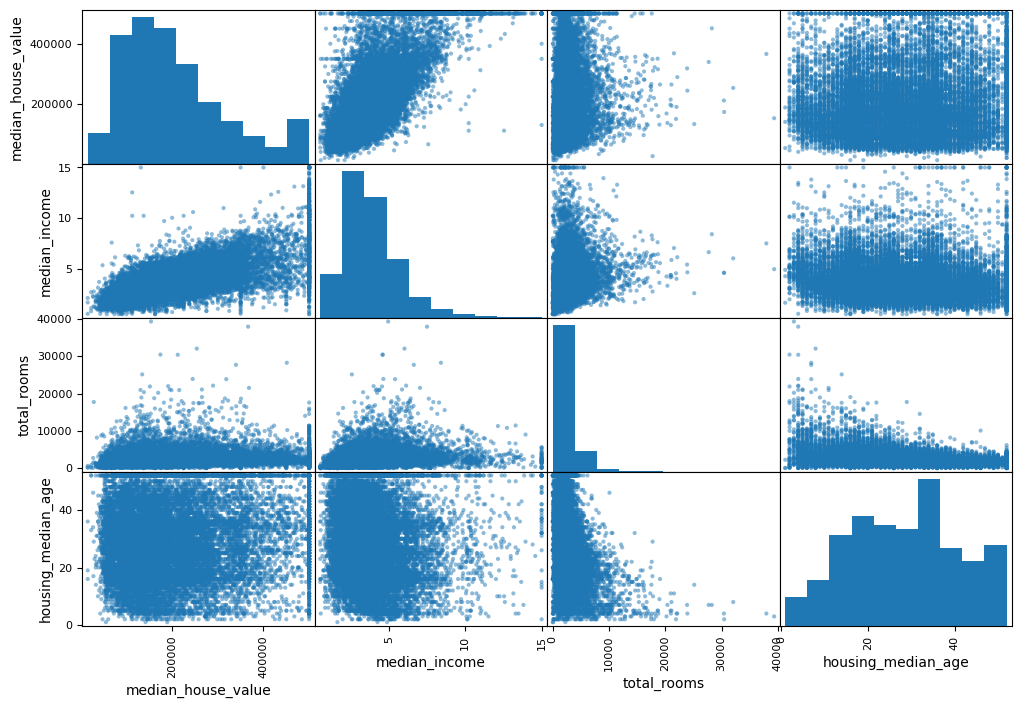

In [42]:
# This scatter matrix plots every numerical attribute against every other numerical attribute, 
# plus a histogram of each numerical attribute
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

The most promising attribute to predict the median house value is the median income, so let's zoom in on thier correlation scatter plot

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

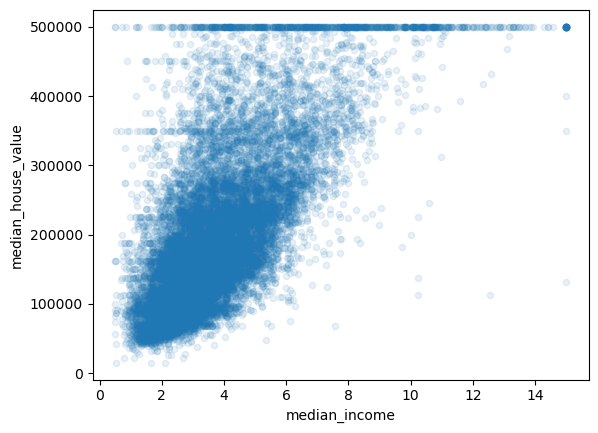

In [43]:
# median income vs median house value

housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

#### Excercise
The plot revels a few things. First the correlation is indeed strong; you can see an upward trend and the points are not too dispursed. Second the prize cap that we noticed earlier is clearly visible as a horizontal line at \\$500,000. But this plot also reveals other less obvious straight lines: at \\$450,000, \\$350,000, and perhaps \\$280,000, and a few more below that.

Try removing the corresponding districts to prevent your algorithms from learning to reproduce these data quirks.

In [44]:
values = housing["median_house_value"].value_counts()

prize_caps = list()


for keys in values.keys():
    if values.loc[keys] > 20:
        prize_caps.append(keys)
        
prize_caps.sort()

In [45]:
prize_caps

[67500.0,
 75000.0,
 81300.0,
 87500.0,
 93800.0,
 100000.0,
 106300.0,
 112500.0,
 118800.0,
 125000.0,
 137500.0,
 143800.0,
 150000.0,
 156300.0,
 162500.0,
 170800.0,
 175000.0,
 181300.0,
 187500.0,
 193800.0,
 200000.0,
 212500.0,
 225000.0,
 237500.0,
 250000.0,
 275000.0,
 300000.0,
 350000.0,
 450000.0,
 500000.0,
 500001.0]

In [46]:
# removing house values == 500,000, 450,000, 350,000, 280,000, 
excercise_one = housing[~housing["median_house_value"].isin(prize_caps)]

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

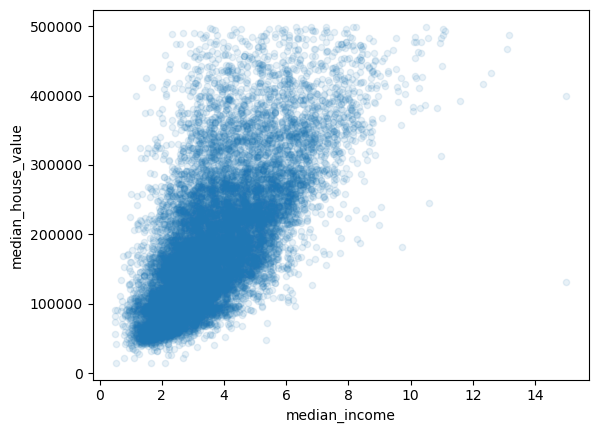

In [47]:
excercise_one.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [48]:
removed_rows = housing[housing["median_house_value"].isin(prize_caps)]

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

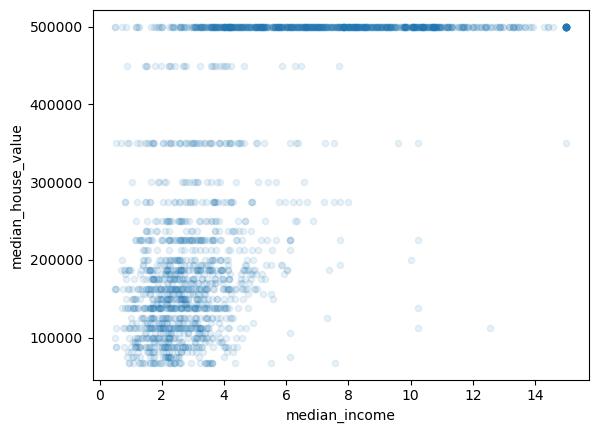

In [49]:
removed_rows.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

### Solution

We started by getting a count of prices that seem to have a cap such as $500,000. My solution involves removing any house values that looked like this may be the case. I ended up removing any median house values that had 11 or more duplicates, this may be too aggressive and should review this and maybe have a duplicate limit of 20 or more.

Using 20 or more seems to look better, revealing very distinct straight lines.


## Experimenting with Attribute Combinations

Lets create new attributes that can help with our machine learning model.

- Number of rooms per household
- Number of bedrooms compared to rooms
- Population per household

We can create knew columns for these new attribute combinations.

In [50]:
housing.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [51]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [52]:
housing.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [53]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

## Preparing Data for Machine Learning Algorithms

It is good practise to create functions you can re-use instead of manually repeating the same process.

- This will allow you to reporduce these transformations easily on any dataset (e.g, the next time you get a fresh dataset)
- You will gradually build a library of transformation functions that you can reuse in future projects
- You can uses these functions in your live system to transform the new data before feeding it to your algorithms.
- This will make it possible for you to easily try various transformations and see which combinations of transformations work best.

Let's revert to a clean training set (by copying strat_train_set once again), and let's seperate the predictors and the lables since we don't nescessarily want to apply the same transfromations to the predictors and the target values (note that drop() creates a copy of the data and does not affect strat_train_set)

In [54]:
# creating a copy of the training set
housing = strat_train_set.drop("median_house_value", axis=1)
housing_lables = strat_train_set["median_house_value"].copy()

In [55]:
# creating a copy of the test set
housing_test = strat_test_set.drop("median_house_value", axis=1)
housing_test_labels = strat_test_set["median_house_value"].copy()

In [56]:
housing.loc[housing['total_bedrooms'] < 1]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [57]:
housing_test.loc[housing_test['total_bedrooms'] < 5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12458,-114.62,33.62,26.0,18.0,3.0,5.0,3.0,0.5360,INLAND
13606,-117.27,34.17,16.0,30.0,3.0,49.0,8.0,4.6250,INLAND
12649,-121.47,38.51,52.0,20.0,4.0,74.0,9.0,3.6250,INLAND
18210,-122.06,37.39,26.0,18.0,4.0,8.0,4.0,3.7500,NEAR BAY
16171,-122.50,37.79,52.0,8.0,1.0,13.0,1.0,15.0001,NEAR BAY
3126,-117.79,35.21,4.0,2.0,2.0,6.0,2.0,2.3750,INLAND
73,-122.29,37.81,46.0,12.0,4.0,18.0,7.0,0.4999,NEAR BAY


In [58]:
housing_lables

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

## Data Cleaning

Most machine learning algorithms cannot work with missing features, so let's create a few functions to take care of them. You noticed earlier that thte total_bedrooms attribute has some missing values, so let's fix this. You have three options:
- Get rid of the corresponding districts
- Get rid of the whole attribute
- Set the values to some value (zero, the mean, the median, etc.)

You can accomplish these easily using DataFrame's dropna(), drop(), and fillna() methods:

In [59]:
# DataFrames dropna(), drop(), fillna() methods
housing.dropna(subset=["total_bedrooms"]) # option 1

housing.drop("total_bedrooms", axis=1) # option 2

median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

Scikit-Learn provides a handy class to take care of missing values: `SimpleImputer`. 

Here is how to use it. First, you need to create a `SimpleImputer` instance, specifying that you wnat to replace each attribute's missing values with the median of that attribute

In [60]:
# Using SimpleImputer to replace missing values with median vlaues
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [61]:
# Since median can only be computed on numerical attributes, we need to create a copy of the data without
# the text attribute ocean_proimity:
housing_num = housing.drop("ocean_proximity", axis=1)

# fit the imputer instance to the training data using the fit() method:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

The imputer will simply compute the median of all the attributes and stores the result in its statistics_ instance variable.

We cannot be sure if furute data will contain missing values, this provides a convienent and safe way to fill missing data.

In [62]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [63]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [64]:
# Now use the "trained" imputer to transform the training set by replacing missing values by the learned medians:
X = imputer.transform(housing_num)

In [66]:
# The result is a plain NumPy array containing the transformed features. If you want to put it back into a Pandas DataFrame
# it's simple:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [67]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [70]:
imputer.strategy

'median'

## Handling Text and Categorical Attributes

Earlier we left out the categorical attribute ocean_proximity because it is a text attribute so we cannot compute its median:

In [73]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


Most Machline learning algorithms prefer to work with numbers anyway, so let's convert these categories from text to numbers. For this, we can use Scikit-Learn's `OrdinalEncoder` class:

In [74]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [75]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [78]:
# listing categories for each category attritbute
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with this representation is that Machine Learning algorithms will assume that two nearby numbers are more similar than two distant values. This maybe fine in some cases (e.g, for ordered catefories such as "bad", "average", "good", "excellent"), but it is obviously not the case for `ocean_proximity` column (for example, catefories 0 and 4 are clearly more similar than categories 0 and 1). To fix this issue, a common solution is to create one binary attribute per category: one attribute equal to 1 when the category is "<1H OCEAN" (and 0 otherwise), and so on. This is called 'one-hot encoding', because only one attribute will be equal to 1(hot), while the others will be 0(cold). The new attributes are sometimes called dummy attributes. Scikit-Learn provides a `OneHotEncoder` class to convert categorical values into one-hot vectors.

In [80]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [82]:
# Converting sparse array to dense Numpy array
# this uses alot more memory than a sparse array
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [83]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Custom Transformers
Although Scikit-Learn provides many useful transformers, you will need to write your own for tasks such as custom cleanup operations or combining specific attributes.
You will want your transformer to work seamlessly with Scikit-Learn fucntionalities (such as pipelines), and since Scikit-Learn relies on duck typing (not inheritance), all you need is to create a class and implement three methods: `fit()`(returning self), `transform()`, and `fit_transform()`.
You can get the last one for free by simply adding TransformMixin as a base class. Also, if you add BaseEstimator as a base class (avoid *args, **kwargs in your constructor) you will get two extra methods (get_params() and set_params()) that will be useful for automatic hyperparameter tuning. For example, here is a small transformer class that adds combined attributes we discussed earlier.

In [131]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix = 3
bedrooms_ix = 4
population_ix = 5
households_ix = 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self # Nothing else to do
    
    def transform(self, X, y=None):
        room_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, room_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, room_per_household, population_per_household]
    
    def toDF(self, X, cols):
        new_cols = cols.append(pd.Index(["room_per_household", "population_per_household"]))
        
        if self.add_bedrooms_per_room:
            new_cols = new_cols.append(pd.Index(["bedrooms_per_room"]))
            
        return pd.DataFrame(X, columns=new_cols)

In [132]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [104]:
housing_extra_attribs

array([[-121.46, 38.52, 29.0, ..., 'INLAND', 5.485835694050992,
        3.168555240793201],
       [-117.23, 33.09, 7.0, ..., 'NEAR OCEAN', 6.927083333333333,
        2.6236979166666665],
       [-119.04, 35.37, 44.0, ..., 'INLAND', 5.3933333333333335,
        2.223333333333333],
       ...,
       [-122.72, 38.44, 48.0, ..., '<1H OCEAN', 4.1104651162790695,
        2.6627906976744184],
       [-122.7, 38.31, 14.0, ..., '<1H OCEAN', 6.297405189620759,
        2.411177644710579],
       [-122.14, 39.97, 27.0, ..., 'INLAND', 5.477157360406092,
        3.1725888324873095]], dtype=object)

In [134]:
columns = housing.columns

In [135]:
df = attr_adder.toDF(housing_extra_attribs, columns)

In [136]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,room_per_household,population_per_household
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
4,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241
...,...,...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.09,<1H OCEAN,6.658342,2.023976
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND,5.571932,3.363188
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN,4.110465,2.662791
16510,-122.7,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN,6.297405,2.411178


## Feature Scaling